In [19]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

In [20]:

environment = gym.make("FrozenLake-v0",is_slippery=False)
environment.reset()
environment.render()


SFFF
FHFH
FFFH
HFFG


In [21]:
nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

# Let's see how it looks
print('Q-table =')
print(qtable)

Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.      0.81    0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


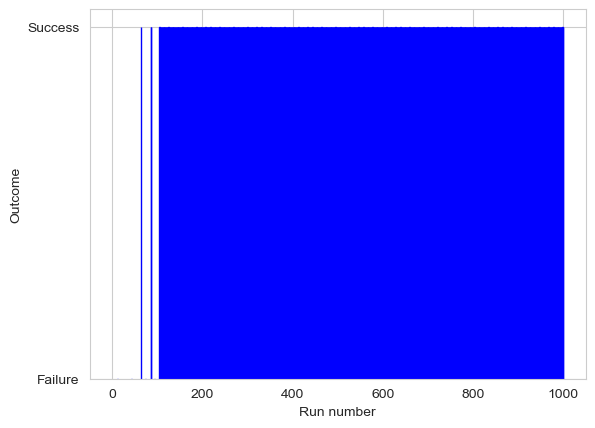

In [22]:
import pdb
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []
rewards = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = environment.step(action)
        # if done:
        #     print(new_state, reward, done, info)
        # Update Q(s,a)

        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        # Update our current state
        state = new_state
        rewards.append(np.mean(qtable))
        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure()
plt.xlabel("Run number")
plt.ylabel("Outcome")
plt.bar(range(len(outcomes)), outcomes, width=0.1, edgecolor='blue', color='None')
plt.show()
# ["LEFT", "DOWN", "RIGHT", "UP"]
# alpha: is the learning rate, set generally between 0 and 1. Setting the alpha value to 0 means that the Q-values are never updated, thereby nothing is learned. If we set the alpha to a high value such as 0.9, it means that the learning can occur quickly.
#
# gamma: It is the discount factor that is set between 0 and 1. This model the fact that future rewards are worth less than immediate rewards.


0.06471254290724678
0.07321234374999999


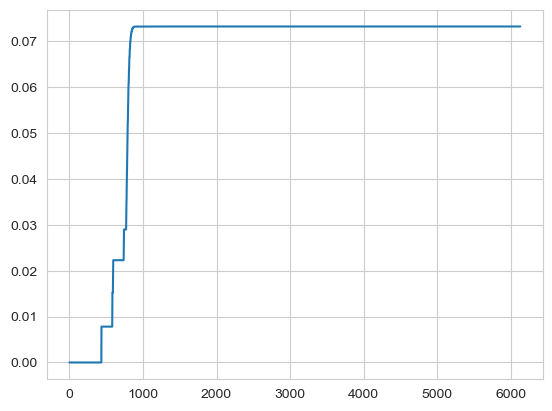

In [28]:
plt.plot(rewards)
print(np.mean(rewards))
print(np.mean(qtable))

In [24]:
episodes = 100
nb_success = 0
# Evaluation
for i in range(100):
    state = environment.reset()
    done = False
    converged = 0

    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = environment.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [25]:
from IPython.display import clear_output
import time

state = environment.reset()
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = environment.action_space.sample()

    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info = environment.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    environment.render()
    time.sleep(1)

print(f"Sequence = {sequence}")

  (Right)
SFFF
FHFH
FFFH
HFFG
Sequence = [1, 1, 2, 2, 1, 2]


In [26]:
he parameters used in the Q-value update process are:

 - the learning rate, set between 0 and 1. Setting it to 0 means that the Q-values are never updated, hence nothing is learned. Setting a high value such as 0.9 means that learning can occur quickly.

SyntaxError: invalid syntax (1563753322.py, line 1)